# Calling Azure Forms Recognizer model for French IDs

In [1]:
import json
import time
import getopt
import sys
import os
from requests import get, post
import matplotlib.pyplot as plt 
import cv2
import uuid
import pandas as pd
from IPython.display import display_javascript, display_html, display
import numpy as np

In [2]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

## 1. Settings

In [3]:
endpoint = r"yourendpoint"
apim_key = "yourkey"
model_id = "yourmodelid"
API_version = "v2.1"
post_url = endpoint + "/formrecognizer/%s/custom/models/%s/analyze" % (API_version, model_id)

In [4]:
print("Ready to use Azure Forms Recognizer API:", post_url, '\n\nAPI Version:', API_version)

Ready to use Azure Forms Recognizer API: https://azureformsrecognizer-cni.cognitiveservices.azure.com//formrecognizer/v2.1/custom/models/c6d1b124-5b17-4428-bd31-64662527778b/analyze 

API Version: v2.1


### Image to analyse

In [39]:
document = r"TestImages/Test1.jpg"

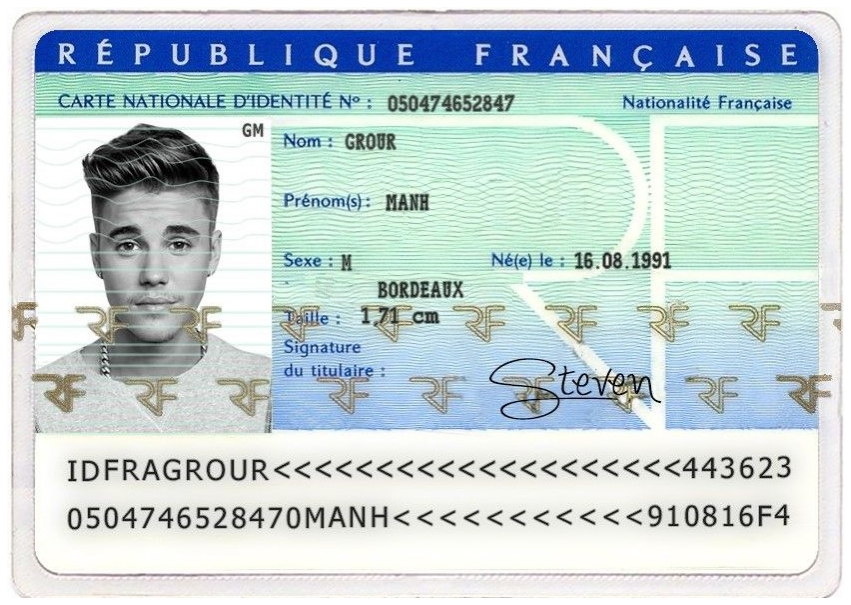

In [40]:
image = cv2.imread(document)
plt.figure(figsize=(15, 15)) 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image_rgb)

## 2. Calling the Azure Forms Recognizer Model

In [41]:
params = {
    "includeTextDetails": True
}

headers = {
    # Request headers
    'Content-Type': 'application/pdf',
    'Ocp-Apim-Subscription-Key': apim_key,
}
with open(document, "rb") as f:
    data_bytes = f.read()

try:
    resp = post(url = post_url, data = data_bytes, headers = headers, params = params)
    if resp.status_code != 202:
        print("POST analyze failed:\n%s" % json.dumps(resp.json()))
        quit()
    print("POST analyze succeeded:\n%s" % resp.headers)
    get_url = resp.headers["operation-location"]
except Exception as e:
    print("POST analyze failed:\n%s" % str(e))
    quit()

time.sleep(5)
resp = get(url = get_url, headers = {"Ocp-Apim-Subscription-Key": apim_key})
resp_json = resp.json()
resp_json

POST analyze succeeded:
{'Content-Length': '0', 'Operation-Location': 'https://azureformsrecognizer-cni.cognitiveservices.azure.com/formrecognizer/v2.1/custom/models/c6d1b124-5b17-4428-bd31-64662527778b/analyzeresults/0ba9fe2a-d7a1-4602-bae6-a5254e72bdf5', 'x-envoy-upstream-service-time': '166', 'apim-request-id': '78a0c9da-5bb0-4c78-9edc-79a785201280', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'x-content-type-options': 'nosniff', 'Date': 'Wed, 06 Oct 2021 13:18:33 GMT'}


{'status': 'succeeded',
 'createdDateTime': '2021-10-06T13:18:33Z',
 'lastUpdatedDateTime': '2021-10-06T13:18:37Z',
 'analyzeResult': {'version': '2.1.0',
  'readResults': [{'page': 1,
    'angle': 0.2755,
    'width': 838,
    'height': 592,
    'unit': 'pixel',
    'lines': [{'boundingBox': [49, 32, 409, 35, 408, 62, 48, 59],
      'text': 'RÉPUBLIQUE',
      'appearance': {'style': {'name': 'other', 'confidence': 0.878}},
      'words': [{'boundingBox': [49, 32, 400, 35, 399, 62, 49, 60],
        'text': 'RÉPUBLIQUE',
        'confidence': 0.721}]},
     {'boundingBox': [466, 35, 793, 35, 793, 64, 466, 63],
      'text': 'FRANÇAISE',
      'appearance': {'style': {'name': 'other', 'confidence': 0.878}},
      'words': [{'boundingBox': [467, 35, 785, 35, 784, 62, 467, 61],
        'text': 'FRANÇAISE',
        'confidence': 0.733}]},
     {'boundingBox': [48, 85, 511, 86, 511, 107, 48, 104],
      'text': "CARTE NATIONALE D'IDENTITÉ Nº : 050474652847",
      'appearance': {'style': {'

## 3. Displaying the JSON results

In [42]:
class JSONviewer(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json
        self.uuid = str(uuid.uuid4())
        
    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid),
            raw=True
        )
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
          renderjson.set_show_to_level(1)
          document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [43]:
JSONviewer(resp_json)

### Extracting the fields

In [44]:
# Values
Number = resp_json['analyzeResult']['documentResults'][0]['fields']['Number']['valueString']
Nom = resp_json['analyzeResult']['documentResults'][0]['fields']['Nom']['valueString']
Prénoms = resp_json['analyzeResult']['documentResults'][0]['fields']['Prénoms']['valueString']
Sexe = resp_json['analyzeResult']['documentResults'][0]['fields']['Sexe']['valueString']
DateNaissance = resp_json['analyzeResult']['documentResults'][0]['fields']['DateNaissance']['text']
LieuNaissance = resp_json['analyzeResult']['documentResults'][0]['fields']['LieuNaissance']['valueString']
Taille = resp_json['analyzeResult']['documentResults'][0]['fields']['Taille']['valueNumber']
MachineReadableZone1 = resp_json['analyzeResult']['documentResults'][0]['fields']['MachineReadableZone1']['valueString']
MachineReadableZone2 = resp_json['analyzeResult']['documentResults'][0]['fields']['MachineReadableZone2']['valueString']

In [45]:
# Bounding Box
NumberBB = resp_json['analyzeResult']['documentResults'][0]['fields']['Number']['boundingBox']
NomBB = resp_json['analyzeResult']['documentResults'][0]['fields']['Nom']['boundingBox']
PrénomsBB = resp_json['analyzeResult']['documentResults'][0]['fields']['Prénoms']['boundingBox']
SexeBB = resp_json['analyzeResult']['documentResults'][0]['fields']['Sexe']['boundingBox']
DateNaissanceBB = resp_json['analyzeResult']['documentResults'][0]['fields']['DateNaissance']['boundingBox']
LieuNaissanceBB = resp_json['analyzeResult']['documentResults'][0]['fields']['LieuNaissance']['boundingBox']
TailleBB = resp_json['analyzeResult']['documentResults'][0]['fields']['Taille']['boundingBox']
MachineReadableZone1BB = resp_json['analyzeResult']['documentResults'][0]['fields']['MachineReadableZone1']['boundingBox']
MachineReadableZone2BB = resp_json['analyzeResult']['documentResults'][0]['fields']['MachineReadableZone2']['boundingBox']

### Displaying the results in the image

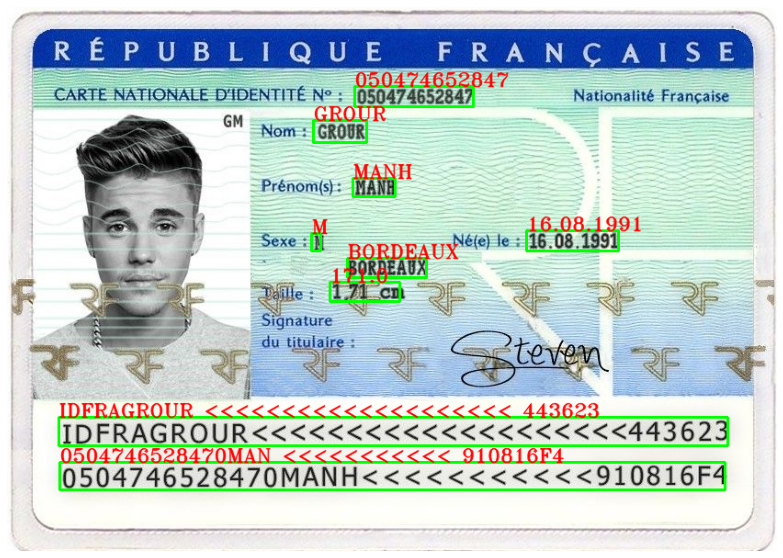

In [50]:
image = cv2.imread(document)
plt.figure(figsize=(15, 10)) 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding Box coordinates
NumberBBX=int(NumberBB[0])
NumberBBY=int(NumberBB[1])
NomBBX=int(NomBB[0])
NomBBY=int(NomBB[1])
PrenomsBBX=int(PrénomsBB[0])
PrenomsBBY=int(PrénomsBB[1])
SexeBBX=int(SexeBB[0])
SexeBBY=int(SexeBB[1])
DateNaissanceBBX=int(DateNaissanceBB[0])
DateNaissanceBBY=int(DateNaissanceBB[1])
LieuNaissanceBBX=int(LieuNaissanceBB[0])
LieuNaissanceBBY=int(LieuNaissanceBB[1])
TailleBBX=int(TailleBB[0])
TailleBBY=int(TailleBB[1])
MachineReadableZone1BBX=int(MachineReadableZone1BB[0])
MachineReadableZone1BBY=int(MachineReadableZone1BB[1])
MachineReadableZone2BBX=int(MachineReadableZone2BB[0])
MachineReadableZone2BBY=int(MachineReadableZone2BB[1])

# Values
COLOR=(255, 0, 0)
COLORBB=(0, 255, 0)
FONT=cv2.FONT_HERSHEY_TRIPLEX
SIZE=0.7
SIZERECTANGLE=2

# Displaying BBox and values
ptsNumber = np.array(NumberBB, np.int32).reshape((-1,1,2))
ptsNom = np.array(NomBB, np.int32).reshape((-1,1,2))
ptsPrenoms = np.array(PrénomsBB, np.int32).reshape((-1,1,2))
ptsSexe = np.array(SexeBB, np.int32).reshape((-1,1,2))
ptsDateNaissance = np.array(DateNaissanceBB, np.int32).reshape((-1,1,2))
ptsLieuNaissance = np.array(LieuNaissanceBB, np.int32).reshape((-1,1,2))
ptsTaille = np.array(TailleBB, np.int32).reshape((-1,1,2))
ptsMachineReadableZone1 = np.array(MachineReadableZone1BB, np.int32).reshape((-1,1,2))
ptsMachineReadableZone2 = np.array(MachineReadableZone2BB, np.int32).reshape((-1,1,2))
image = cv2.polylines(image_rgb, [ptsNumber], True, COLORBB, SIZERECTANGLE)
image = cv2.polylines(image_rgb, [ptsNom], True, COLORBB, SIZERECTANGLE)
image = cv2.polylines(image_rgb, [ptsPrenoms], True, COLORBB, SIZERECTANGLE)
image = cv2.polylines(image_rgb, [ptsSexe], True, COLORBB, SIZERECTANGLE)
image = cv2.polylines(image_rgb, [ptsDateNaissance], True, COLORBB, SIZERECTANGLE)
image = cv2.polylines(image_rgb, [ptsLieuNaissance], True, COLORBB, SIZERECTANGLE)
image = cv2.polylines(image_rgb, [ptsTaille], True, COLORBB, SIZERECTANGLE)
image = cv2.polylines(image_rgb, [ptsMachineReadableZone1], True, COLORBB, SIZERECTANGLE)
image = cv2.polylines(image_rgb, [ptsMachineReadableZone2], True, COLORBB, SIZERECTANGLE)
image = cv2.putText(image_rgb, str(Number), (NumberBBX, NumberBBY), FONT, SIZE, COLOR, 1, cv2.LINE_AA)
image = cv2.putText(image_rgb, str(Nom),   (NomBBX, NomBBY), FONT, SIZE, COLOR, 1, cv2.LINE_AA)
image = cv2.putText(image_rgb, str(Prénoms), (PrenomsBBX, PrenomsBBY), FONT, SIZE, COLOR, 1, cv2.LINE_AA)
image = cv2.putText(image_rgb, str(Sexe), (SexeBBX, SexeBBY), FONT, SIZE, COLOR, 1, cv2.LINE_AA)
image = cv2.putText(image_rgb, str(DateNaissance), (DateNaissanceBBX, DateNaissanceBBY), FONT,SIZE, COLOR, 1, cv2.LINE_AA)
image = cv2.putText(image_rgb, str(LieuNaissance), (LieuNaissanceBBX, LieuNaissanceBBY), FONT, SIZE, COLOR, 1, cv2.LINE_AA)
image = cv2.putText(image_rgb, str(Taille), (TailleBBX, TailleBBY), FONT, SIZE, COLOR, 1, cv2.LINE_AA)
image = cv2.putText(image_rgb, str(MachineReadableZone1), (MachineReadableZone1BBX, MachineReadableZone1BBY), 
                    FONT, SIZE, COLOR, 1, cv2.LINE_AA)
image = cv2.putText(image_rgb, str(MachineReadableZone2), (MachineReadableZone2BBX, MachineReadableZone2BBY), 
                    FONT, SIZE, COLOR, 1, cv2.LINE_AA)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [51]:
print('1. Numéro :', Number)
print('2. Nom :',Nom)
print('3. Prénoms :', Prénoms)
print('4. Sexe :', Sexe)
print('5. Date de Naissance :', DateNaissance)
print('6. Lieu de Naissance :', LieuNaissance)
print('7. Taille :',Taille)
print('8. MachineReadableZone1 :', MachineReadableZone1)
print('9. MachineReadableZone2 :', MachineReadableZone2)

1. Numéro : 050474652847
2. Nom : GROUR
3. Prénoms : MANH
4. Sexe : M
5. Date de Naissance : 16.08.1991
6. Lieu de Naissance : BORDEAUX
7. Taille : 171.0
8. MachineReadableZone1 : IDFRAGROUR <<<<<<<<<<<<<<<<<<<< 443623
9. MachineReadableZone2 : 0504746528470MAN <<<<<<<<<<< 910816F4


## Export to CSV & Excel files

In [48]:
cnidata = {'Numéro':  [Number], 'Nom': [Nom], 'Prénoms': [Prénoms], 'Sexe': [Sexe],'Date de Naissance': [DateNaissance],
           'Lieu de Naissance': [LieuNaissance], 'Taille': [Taille], 'Zone1': [MachineReadableZone1],
           'Zone2': [MachineReadableZone2]}

cnidf = pd.DataFrame(cnidata)
cnidf.head()

,Numéro,Nom,Prénoms,Sexe,Date de Naissance,Lieu de Naissance,Taille,Zone1,Zone2
0,050474652847,GROUR,MANH,M,16.08.1991,BORDEAUX,171.0,IDFRAGROUR <<<<<<<<<<<<<<<<<<<< 443623,0504746528470MAN <<<<<<<<<<< 910816F4


In [49]:
cnidf.dtypes

Numéro                object
Nom                   object
Prénoms               object
Sexe                  object
Date de Naissance     object
Lieu de Naissance     object
Taille               float64
Zone1                 object
Zone2                 object
dtype: object

In [16]:
cnidf.to_csv(r'cni.csv', index=False)

In [17]:
cnidf.to_excel(r'cni.xlsx', index=False)